### Import

In [1]:
from ipywidgets import FloatProgress
import codecs
from io import StringIO
from scipy.stats import ttest_ind 
from IPython.display import display
import sys
sys.getdefaultencoding()
import mapply
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandera as pa
import plotly.express as px
import plotly.graph_objects as go
import time
import warnings
from pathlib import Path as p
from datetime import timedelta, datetime
from loguru import logger
from pandera import Column, DataFrameSchema
from pathlib import Path as p
from skimpy import skim, clean_columns
from tqdm.autonotebook import tqdm
import platform
platform.architecture()
platform.python_version()
tqdm.pandas()
%matplotlib inline
warnings.filterwarnings('ignore')
now = time.strftime("%Y%m%d")
logger.info('Notebook édité le {}'.format(now))
pd.set_option('display.max_colwidth', None)
pd.options.plotting.backend = 'plotly' #matplotlib
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
sns.set()
# Create an instance of InteractiveShell
shell = InteractiveShell.instance()
# Example: Enable auto-execution of code in a Jupyter notebook cell
shell.ast_node_interactivity = 'all'
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer

2024-10-20 19:17:53.536 | INFO     | __main__:<module>:32 - Notebook édité le 20241020


### Dataset

### Load data

In [2]:
df = pd.read_csv('audible_uncleaned.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         87489 non-null  object 
 1   author       87489 non-null  object 
 2   narrator     87489 non-null  object 
 3   time         87489 non-null  object 
 4   releasedate  87489 non-null  object 
 5   language     87489 non-null  object 
 6   stars        87489 non-null  object 
 7   editor       143 non-null    object 
 8   price        87489 non-null  object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  24 non-null     object 
 14  Unnamed: 14  0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 10.0+ MB


In [4]:
df.head(20)

,name,author,narrator,time,releasedate,language,stars,editor,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04/08/2008,English,5 out of 5 stars34 ratings,W.W. Norton & Company,468.00,NaN,NaN,NaN,NaN,NaN,NaN
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01/05/2018,English,4.5 out of 5 stars41 ratings,Random House,820.00,NaN,NaN,NaN,NaN,NaN,NaN
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06/11/2020,English,4.5 out of 5 stars38 ratings,Viking Press,410.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05/10/2021,English,4.5 out of 5 stars12 ratings,Doubleday,615.00,NaN,NaN,NaN,NaN,NaN,NaN
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13/01/2010,English,4.5 out of 5 stars181 ratings,"Farrar, Straus and Giroux",820.00,NaN,NaN,NaN,NaN,W.W. Norton & Company,NaN
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30/10/2018,English,5 out of 5 stars72 ratings,Bloomsbury Children's Books,656.00,NaN,NaN,NaN,NaN,Random House,NaN
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25/11/2014,English,5 out of 5 stars11 ratings,Candlewick Press,233.00,NaN,NaN,NaN,NaN,Viking Press,NaN
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02/05/2017,English,5 out of 5 stars50 ratings,Usborne Publishing,820.00,NaN,NaN,NaN,NaN,Doubleday,NaN
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02/05/2017,English,5 out of 5 stars5 ratings,Walker Books,"1,256.00",NaN,NaN,NaN,NaN,"Farrar, Straus and Giroux",NaN
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24/09/2019,English,5 out of 5 stars58 ratings,Puffin Books,820.00,NaN,NaN,NaN,NaN,Bloomsbury Children's Books,NaN


### Functions

In [5]:
def convert_price_type():
    df['price'] = df['price'].str.replace('Free','0',regex=False)
    df['price'] = df['price'].str.replace(',','',regex=False)
    df['price'] = df['price'].str.replace('.00', '',regex=False)
    df['price'] = df['price'].astype(float)
    df['price'] = df['price'].astype(int)
#Convert columns types tp appropiate types
def convert_dtypes():
    df['name'] = df['name'].astype("string")
    df['author'] = df['author'].astype("string")
    df['narrator'] = df['narrator'].astype("string")
    df['releasedate'] = pd.to_datetime(df['releasedate'], format='%d/%m/%Y')
    df['language'] = df['language'].astype("string")
    convert_price_type()

def count_null():
    missing_values = df.isnull().sum()  
    print("Missing Values:\n", missing_values)

def count_unique():
    print(df.nunique())

#Convert Time column from text to minutes
def convert_to_minutes(time_str):
    total_minutes = 0
    time_list = time_str.split()
    for i in range(0, len(time_list), 2):
        if i + 1 < len(time_list):
            if time_list[i + 1] == 'hrs' or time_list[i + 1] == 'hr':
                total_minutes += int(time_list[i]) * 60
            elif time_list[i + 1] == 'mins' or time_list[i + 1] == 'min':
                total_minutes += int(time_list[i])
    return total_minutes


### Data cleaning

In [6]:
#Removing unnecessary columns with very few values
columns_to_drop = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','editor']
df.drop(columns=columns_to_drop, inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
convert_dtypes()

In [8]:
#fixing columns
df['language'] = df['language'].str.capitalize()
df['author'] = df['author'].str.replace('Writtenby:', '', regex=False)
df['narrator'] = df['narrator'].str.replace('Narratedby:', '', regex=False)
df['time'] = df['time'].apply(convert_to_minutes)
df['stars'] = df['stars'].replace('Not rated yet', np.nan)

In [9]:
df['stars'] = df['stars'].astype("string")
df[['stars', 'ratings']] = df['stars'].str.extract(r'([\d.]+) out of [\d.]+ stars(\d+) ratings')
df['stars'] = df['stars'].astype(float)
df['ratings'] = df['ratings'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87489 non-null  string        
 1   author       87489 non-null  string        
 2   narrator     87489 non-null  string        
 3   time         87489 non-null  int64         
 4   releasedate  87489 non-null  datetime64[ns]
 5   language     87489 non-null  string        
 6   stars        9211 non-null   float64       
 7   price        87489 non-null  int32         
 8   ratings      9211 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), string(4)
memory usage: 5.7 MB


In [10]:
df.columns = [col.capitalize() for col in df.columns]
df.head(10)

,Name,Author,Narrator,Time,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,120,2008-08-04,English,5.0,468,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,780,2018-05-01,English,4.5,820,41.0
2,The Deep End,JeffKinney,DanRussell,120,2020-11-06,English,4.5,410,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,660,2021-10-05,English,4.5,615,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820,181.0
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslany,600,2018-10-30,English,5.0,656,72.0
6,Quest for the Diamond Sword,WinterMorgan,LukeDaniels,120,2014-11-25,English,5.0,233,11.0
7,The Dark Prophecy,RickRiordan,RobbieDaymond,720,2017-05-02,English,5.0,820,50.0
8,Merlin Mission Collection,MaryPopeOsborne,MaryPopeOsborne,600,2017-05-02,English,5.0,1256,5.0
9,The Tyrant’s Tomb,RickRiordan,RobbieDaymond,780,2019-09-24,English,5.0,820,58.0


In [11]:
df['Ratings'] = df['Ratings'].replace(np.nan,0)
df['Stars'] = df['Stars'].replace(np.nan,0)

In [12]:
df.drop_duplicates(inplace=True)

### Feature Engineering

In [13]:
#add column Release_Year
df['Release_Year'] = df['Releasedate'].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87468 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          87468 non-null  string        
 1   Author        87468 non-null  string        
 2   Narrator      87468 non-null  string        
 3   Time          87468 non-null  int64         
 4   Releasedate   87468 non-null  datetime64[ns]
 5   Language      87468 non-null  string        
 6   Stars         87468 non-null  float64       
 7   Price         87468 non-null  int32         
 8   Ratings       87468 non-null  float64       
 9   Release_Year  87468 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), string(4)
memory usage: 6.7 MB


In [15]:
# Calculate the minimum and maximum years
min_year = df['Release_Year'].min()
max_year = df['Release_Year'].max()

# Calculate the upper bound for binning
upper_bound = max_year + (5 - max_year % 5)

# Create a new column for release year intervals
df['Release_Year_Group'] = pd.cut(df['Release_Year'], bins=range(min_year, upper_bound + 5, 5),
                                  labels=[f'{i}-{i+5}' for i in range(min_year, upper_bound, 5)])


In [16]:
#Handling edge case for Release_Year_Group
df['Release_Year_Group'] = df['Release_Year_Group'].fillna('1998-2003')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87468 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                87468 non-null  string        
 1   Author              87468 non-null  string        
 2   Narrator            87468 non-null  string        
 3   Time                87468 non-null  int64         
 4   Releasedate         87468 non-null  datetime64[ns]
 5   Language            87468 non-null  string        
 6   Stars               87468 non-null  float64       
 7   Price               87468 non-null  int32         
 8   Ratings             87468 non-null  float64       
 9   Release_Year        87468 non-null  int32         
 10  Release_Year_Group  87468 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(2), int64(1), string(4)
memory usage: 6.8 MB


In [18]:
min_price = df['Price'].min()
max_price = df['Price'].max()
print("Minimum price:", min_price)
print("Maximum price:", max_price)
print(len(df[(df['Price'] >= 1001) & (df['Price'] <= 1149)]))

Minimum price: 0
Maximum price: 7198
4427


In [19]:
# Create the Price_Category column based on Price column
bins = [0, 200, 500, 750, 1000, 1149, float('inf')]
labels = ['Budget', 'Moderate', 'Premium', 'High-end', 'Luxury', 'Ultra-luxury']
df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

In [20]:
# Reorder the columns for readability 
desired_columns = ['Name', 'Author', 'Narrator', 'Time', 'Language', 'Releasedate', 'Release_Year', 
                   'Release_Year_Group', 'Ratings', 'Stars', 'Price', 'Price_Category']
df = df[desired_columns]

### Exploratory Data Analysis (EDA)

In [21]:
df.describe()

,Time,Releasedate,Release_Year,Ratings,Stars,Price
count,87468.000000,87468,87468.000000,87468.000000,87468.000000,87468.000000
mean,393.339930,2018-06-24 07:04:09.416929536,2017.988339,2.399620,0.471955,559.044039
min,0.000000,1998-12-27 00:00:00,1998.000000,0.000000,0.000000,0.000000
25%,120.000000,2016-09-06 00:00:00,2016.000000,0.000000,0.000000,268.000000
50%,360.000000,2020-02-06 00:00:00,2020.000000,0.000000,0.000000,585.000000
75%,540.000000,2021-08-17 00:00:00,2021.000000,0.000000,0.000000,755.000000
max,8580.000000,2025-11-14 00:00:00,2025.000000,985.000000,5.000000,7198.000000
std,359.579109,NaN,4.257444,23.784898,1.386206,336.062094


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87468 entries, 0 to 87488
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                87468 non-null  string        
 1   Author              87468 non-null  string        
 2   Narrator            87468 non-null  string        
 3   Time                87468 non-null  int64         
 4   Language            87468 non-null  string        
 5   Releasedate         87468 non-null  datetime64[ns]
 6   Release_Year        87468 non-null  int32         
 7   Release_Year_Group  87468 non-null  category      
 8   Ratings             87468 non-null  float64       
 9   Stars               87468 non-null  float64       
 10  Price               87468 non-null  int32         
 11  Price_Category      87468 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int32(2), int64(1), string(4)
memory usage: 6.8 MB


In [23]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 87468  │ │ string      │ 4     │ │ Release_Year_Group    │                                │
│ │ Number of columns │ 12     │ │ int32       │ 3     │ │ Price_Category        │                                │
│ └───────────────────┴────────┘ │ category    │ 2     │ └───────────────────────┘                                │
│                                │ float64     │ 2     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Time              │    0 │      0 │    390 │   360 │      0 │    120 │    360 │    540 │   8600 │    ▇     │  │
│ │ Release_Year      │    0 │      0 │   2000 │   4.3 │   2000 │   2000 │   2000 │   2000 │   2000 │    ▁▃▇▇  │  │
│ │ Ratings           │    0 │      0 │    2.4 │    24 │      0 │      0 │      0 │      0 │    980 │    ▇     │  │
│ │ Stars             │    0 │      0 │   0.47 │   1.4 │      0 │      0 │      0 │      0 │      5 │  ▇    ▁  │  │
│ │ Price             │    0 │      0 │    560 │   340 │      0 │    270 │    580 │    760 │   7200 │    ▇     │  │
│ └───────────────────┴──────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                 ┃ NA      ┃ NA %         ┃ ordered            ┃ unique         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ Release_Year_Group                          │       0 │            0 │ True               │              6 │  │
│ │ Price_Category                              │       0 │            0 │ True               │              6 │  │
│ └─────────────────────────────────────────────┴─────────┴──────────────┴────────────────────┴────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Releasedate            │      0 │         0 │     1998-12-27      │     2025-11-14      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     st

In [24]:
# check if there are any duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
# Find duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
if not duplicated_rows.empty:
    print("Duplicated rows with all columns:")
    print(duplicated_rows)

Number of duplicate rows: 0


<Axes: xlabel='Time', ylabel='Count'>

([<matplotlib.axis.XTick at 0x28559451f90>,
 [Text(0, 0, '0'),
  Text(1000, 0, '1000'),
  Text(2000, 0, '2000'),
  Text(3000, 0, '3000')])

Text(0.5, 1.0, 'Histogram of Time count')

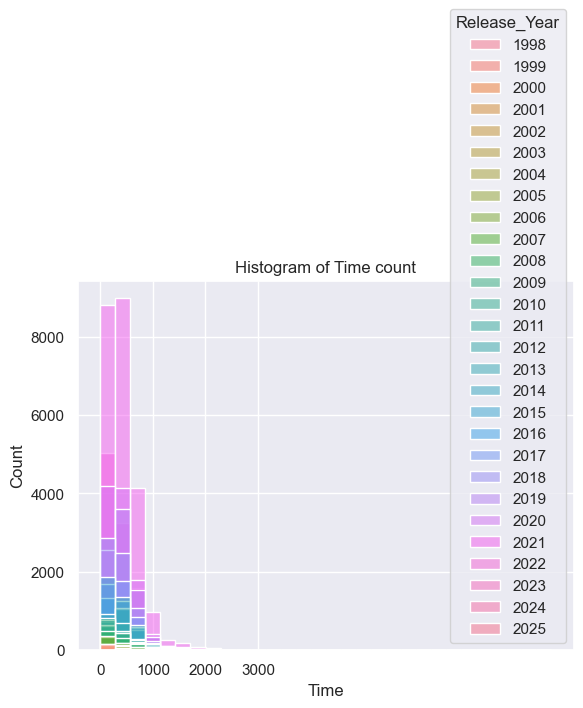

In [25]:
sns.histplot(data=df, x='Time',bins=30,hue='Release_Year', palette='husl')
plt.xticks(ticks=range(0, 4000, 1000))
plt.title('Histogram of Time count')
plt.show()

<Axes: xlabel='Ratings', ylabel='Stars'>

Text(0.5, 1.0, 'Exploring relationship between # of Ratings and Stars based on Language')

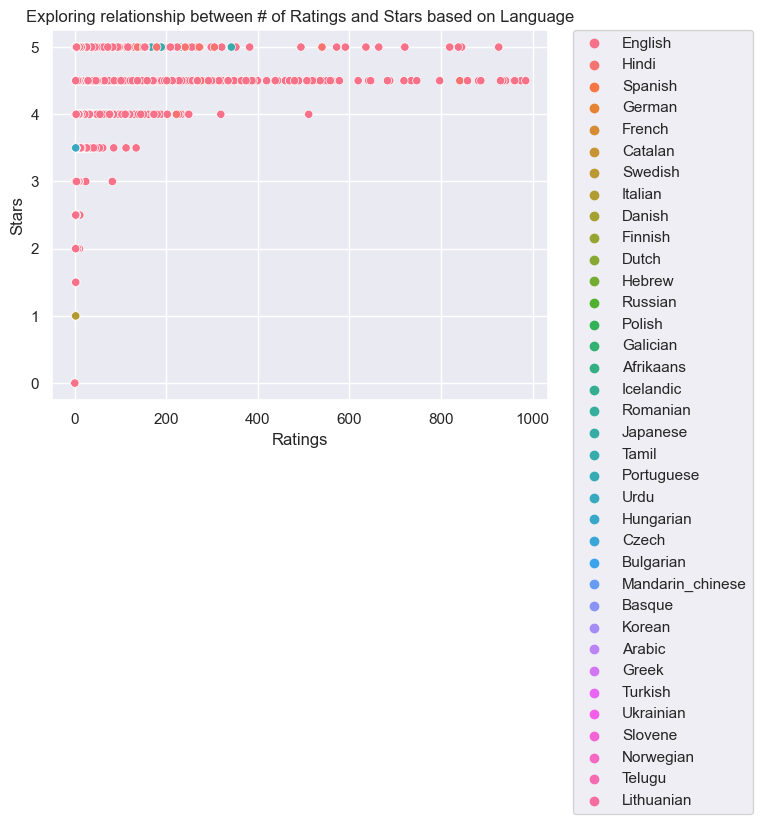

In [26]:
sns.scatterplot(data=df, x='Ratings', y='Stars',hue='Language')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Exploring relationship between # of Ratings and Stars based on Language')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Exploring relationship between # of Ratings and Stars based on release year')

<Axes: title={'center': 'Exploring relationship between # of Ratings and Stars based on release year'}, xlabel='Ratings', ylabel='Stars'>

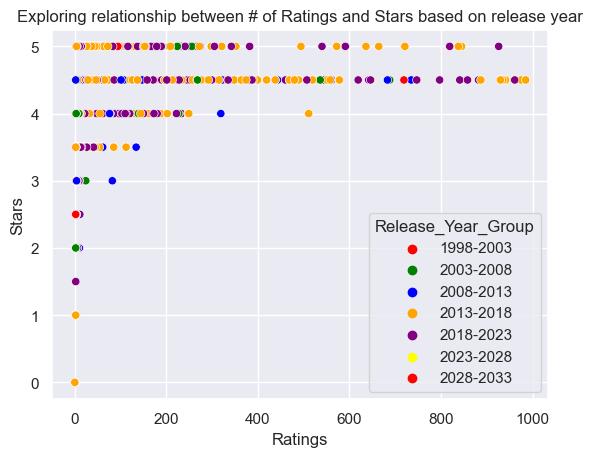

In [27]:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Exploring relationship between # of Ratings and Stars based on release year')
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
sns.scatterplot(data=df, x='Ratings', y='Stars',hue='Release_Year_Group', palette=custom_colors)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Time', ylabel='Count'>

([<matplotlib.axis.XTick at 0x2855b4a5b90>,
 [Text(0, 0, '0'),
  Text(200, 0, '200'),
  Text(400, 0, '400'),
  Text(600, 0, '600'),
  Text(800, 0, '800'),
  Text(1000, 0, '1000'),
  Text(1200, 0, '1200'),
  Text(1400, 0, '1400'),
  Text(1600, 0, '1600'),
  Text(1800, 0, '1800')])

Text(0.5, 0, 'Average Duration (minutes)')

Text(0.5, 1.0, 'Histogram for Time and # of books with Release year as refrence')

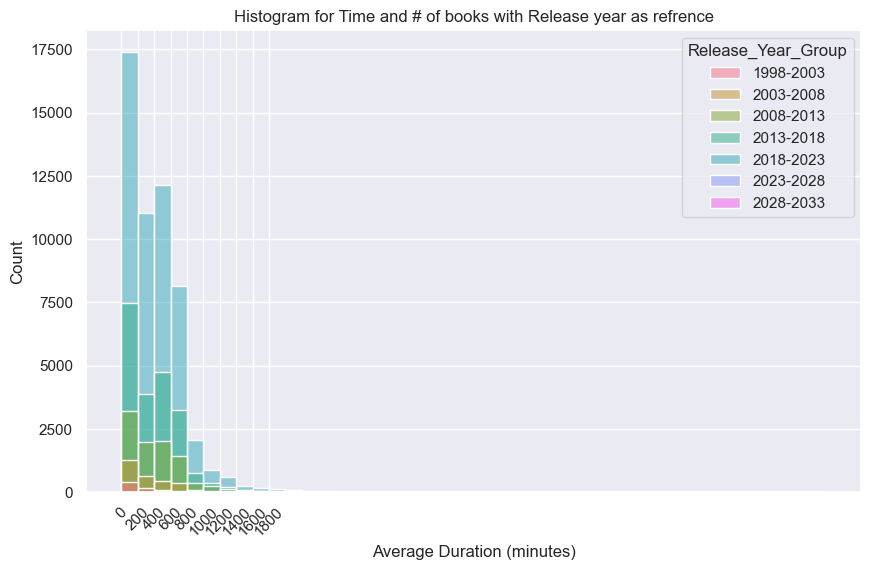

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time',bins=10,hue='Release_Year_Group', palette='husl',binwidth=200)
plt.xticks(ticks=range(0, 2000, 200),rotation=45)
plt.xlabel('Average Duration (minutes)')
plt.title('Histogram for Time and # of books with Release year as refrence')
plt.show()

<Axes: xlabel='Release_Year', ylabel='Price'>

Text(0.5, 1.0, 'The changes of price over the years')

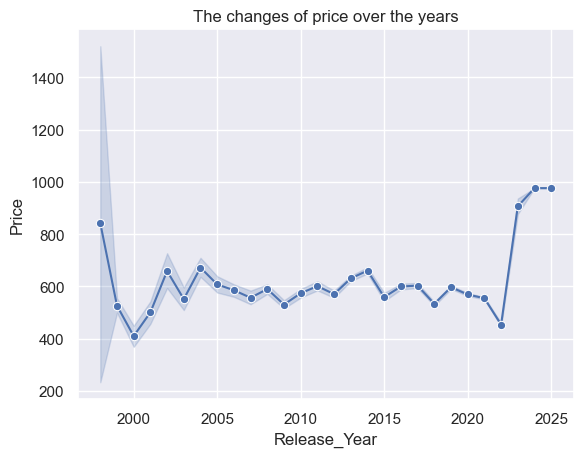

In [29]:
sns.lineplot(data=df, x='Release_Year', y='Price', markers=True,  marker='o')
plt.title('The changes of price over the years')
plt.show()

<Axes: xlabel='Release_Year', ylabel='Price_Category'>

Text(0.5, 1.0, 'The changes of price Category over the years')

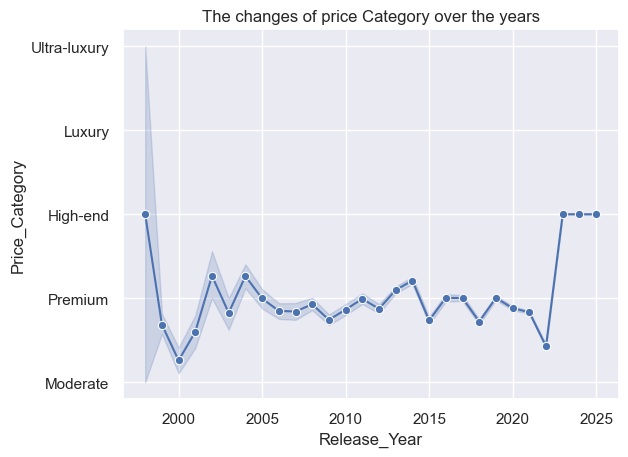

In [30]:
category_order = df['Price_Category'].unique()[::-1]
sns.lineplot(data=df, x='Release_Year', y='Price_Category', markers=True, marker='o')
plt.gca().invert_yaxis()
plt.title('The changes of price Category over the years')
plt.show()

<Axes: xlabel='Price', ylabel='Price_Category'>

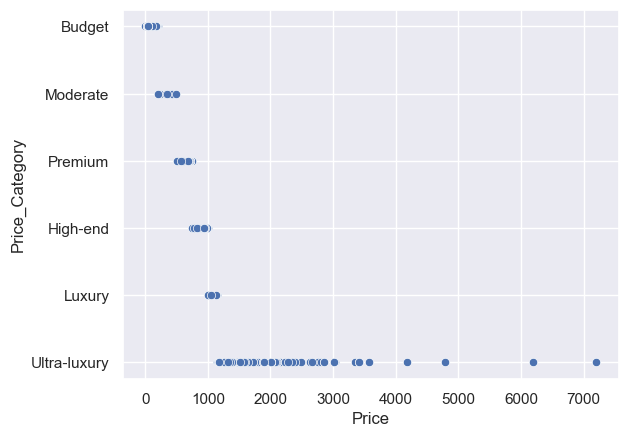

In [31]:
#Discovering outliers in price using data visualization
sns.scatterplot(data=df, x='Price', y='Price_Category',sizes=(0,100))
plt.show()

<Axes: xlabel='Time', ylabel='Price_Category'>

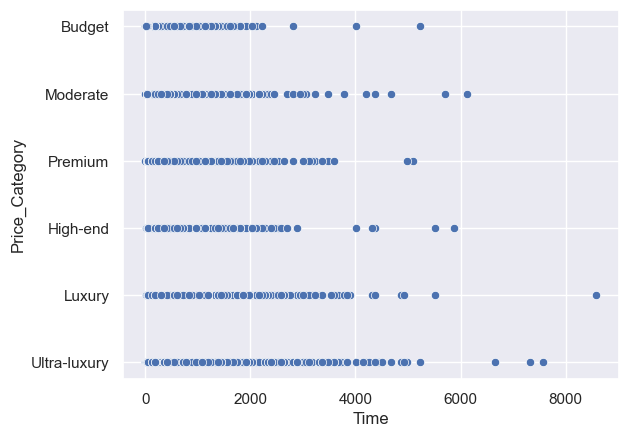

In [32]:
#Discovering outliers in time using data visualization
sns.scatterplot(data=df, x='Time', y='Price_Category',sizes=(0,100))
plt.show()

<Axes: xlabel='Ratings', ylabel='Price_Category'>

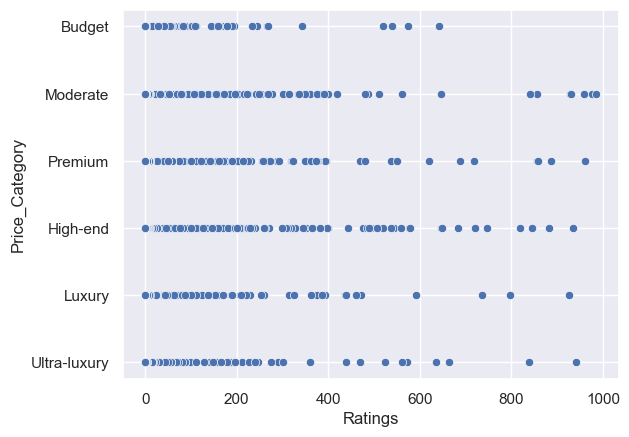

In [33]:
#Discovering outliers in Ratings using data visualization
sns.scatterplot(data=df, x='Ratings', y='Price_Category',sizes=(0,100))
plt.show()

### Split Data

In [34]:
train_df, temp_df = train_test_split(df, test_size=0.20, random_state=42)
test_df, eval_df = train_test_split(temp_df, test_size=0.50, random_state=42)
print("Train split size:", len(train_df))
print("Test split size:", len(test_df))
print("Eval split size:", len(eval_df))

Train split size: 69974
Test split size: 8747
Eval split size: 8747


### Data Quality test

In [35]:
count_null()

Missing Values:
 Name                  0
Author                0
Narrator              0
Time                  0
Language              0
Releasedate           0
Release_Year          0
Release_Year_Group    0
Ratings               0
Stars                 0
Price                 0
Price_Category        0
dtype: int64


In [36]:
count_unique()

Name                  82767
Author                48374
Narrator              29717
Time                    147
Language                 36
Releasedate            5058
Release_Year             28
Release_Year_Group        6
Ratings                 346
Stars                    10
Price                  1009
Price_Category            6
dtype: int64


In [37]:
# check if there are any duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
# Find duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
if not duplicated_rows.empty:
    print("Duplicated rows with all columns:")
    print(duplicated_rows)

Number of duplicate rows: 0


In [38]:
#Making sure there are no avg Stars of 0 when there is 1 or more ratings
#Calculating the number of no ratings
zero_count = (df['Ratings'] == 0).sum()
print("Count of no ratings in the 'Ratings' column:", zero_count)
#Calculating the number of 0 Stars
zero_count2 = (df['Stars'] == 0).sum()
print("Count of 0 in the 'Stars' column:", zero_count2)
if zero_count==zero_count2:
    print("Only no Ratings have 0 Stars") 
else:
    print("there are 0 stars with 1 or more ratings")

Count of no ratings in the 'Ratings' column: 78257
Count of 0 in the 'Stars' column: 78257
Only no Ratings have 0 Stars


In [39]:
print(df['Language'].value_counts())

Language
English             61869
German               8290
Spanish              3496
Japanese             3167
Italian              2694
French               2386
Russian              1803
Danish                935
Portuguese            526
Swedish               515
Hindi                 436
Polish                224
Finnish               197
Dutch                 190
Tamil                 161
Catalan               153
Mandarin_chinese       97
Icelandic              52
Romanian               50
Hungarian              36
Urdu                   34
Afrikaans              28
Czech                  23
Turkish                20
Greek                  18
Arabic                 16
Norwegian              16
Galician               10
Bulgarian               9
Korean                  4
Slovene                 4
Hebrew                  2
Basque                  2
Telugu                  2
Lithuanian              2
Ukrainian               1
Name: count, dtype: Int64


In [40]:
df.to_csv('audible_cleaned.csv', index=False)

In [41]:
#Test readness time for cleaned data 
if os.path.exists('audible_cleaned.csv'):
    mode = 'w'  
else:
    mode = 'x'
df.to_csv('audible_cleaned.csv', index=False, mode=mode)
start = timer()
data = pd.read_csv('audible_cleaned.csv')
end = timer()
elapsed_time = end - start
print("Reading in data takes: {:.3f} seconds".format(elapsed_time))

Reading in data takes: 0.296 seconds
